# Project 4: COVID-19 Data Analysis
# Problem Statement:
# Understanding COVID-19 trends helps in planning public health
# policies.
# Objective:
# Analyze global COVID-19 data to visualize trends and compare
# countries.
# Requirements:
# Dataset: confirmed, recovered, deaths per day
# Clean data, plot cumulative cases
# Use line plots, area charts, heatmaps
# Expected Outcome:
# Visual story of pandemic growth, recoveries, and death rates.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

In [2]:
df=pd.read_csv("covid_19_clean_complete.csv")
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [3]:
df.shape

(49068, 10)

In [4]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Fill missing Province/State
df['Province/State'].fillna('Unknown', inplace=True)

# Basic check
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  49068 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


C:\Users\MALKEET SINGH\AppData\Local\Temp\ipykernel_15872\3169388367.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Province/State'].fillna('Unknown', inplace=True)


In [7]:
global_daily = df.groupby('Date')[['Confirmed', 'Recovered', 'Deaths']].sum().reset_index()
global_daily.tail()


,Date,Confirmed,Recovered,Deaths
183,2020-07-23,15510481,8710969,633506
184,2020-07-24,15791645,8939705,639650
185,2020-07-25,16047190,9158743,644517
186,2020-07-26,16251796,9293464,648621
187,2020-07-27,16480485,9468087,654036


# Global Pandemic Timeline (Line Plot)

A line chart showing the cumulative number of confirmed, recovered, and death cases globally from day one.

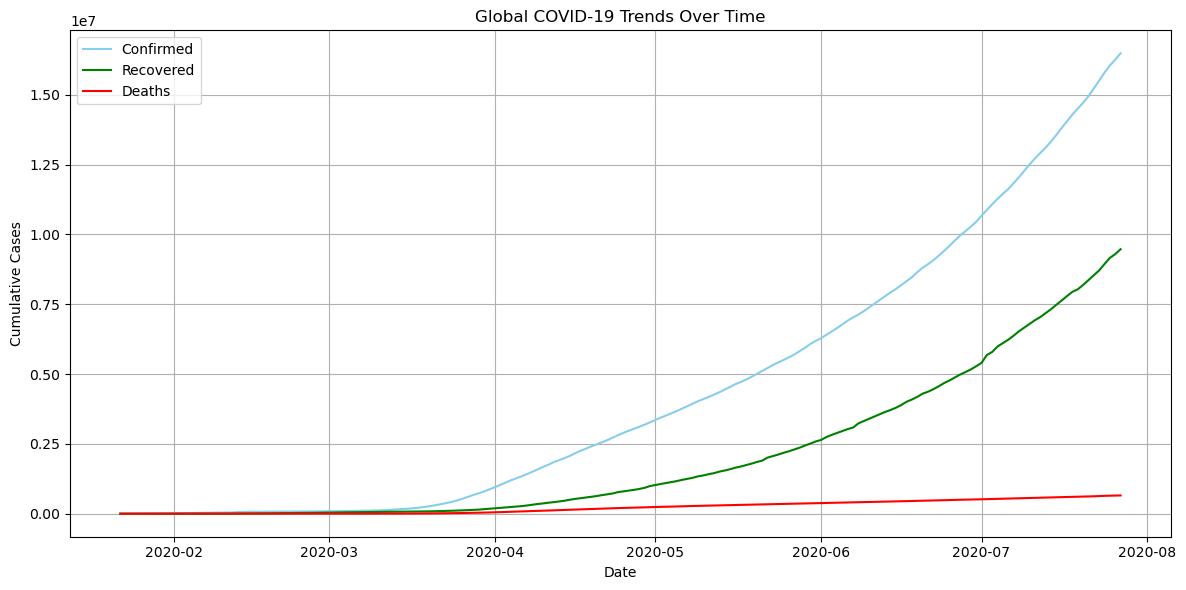

In [14]:
import matplotlib.pyplot as plt

global_daily = df.groupby('Date')[['Confirmed', 'Recovered', 'Deaths']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(global_daily['Date'], global_daily['Confirmed'], label='Confirmed', color='skyblue')
plt.plot(global_daily['Date'], global_daily['Recovered'], label='Recovered', color='green')
plt.plot(global_daily['Date'], global_daily['Deaths'], label='Deaths', color='red')
plt.title("Global COVID-19 Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Story:
The pandemic began slowly, with cases rising in early 2020.

A steep increase in confirmed cases appeared from March 2020.

Recoveries began catching up as health systems adapted.

Despite progress, the death toll rose steadily, reflecting the severity of the virus.

 # Stacked Area Chart: Global Impact

A stacked area chart showing the scale of total confirmed, recovered, and death cases globally.

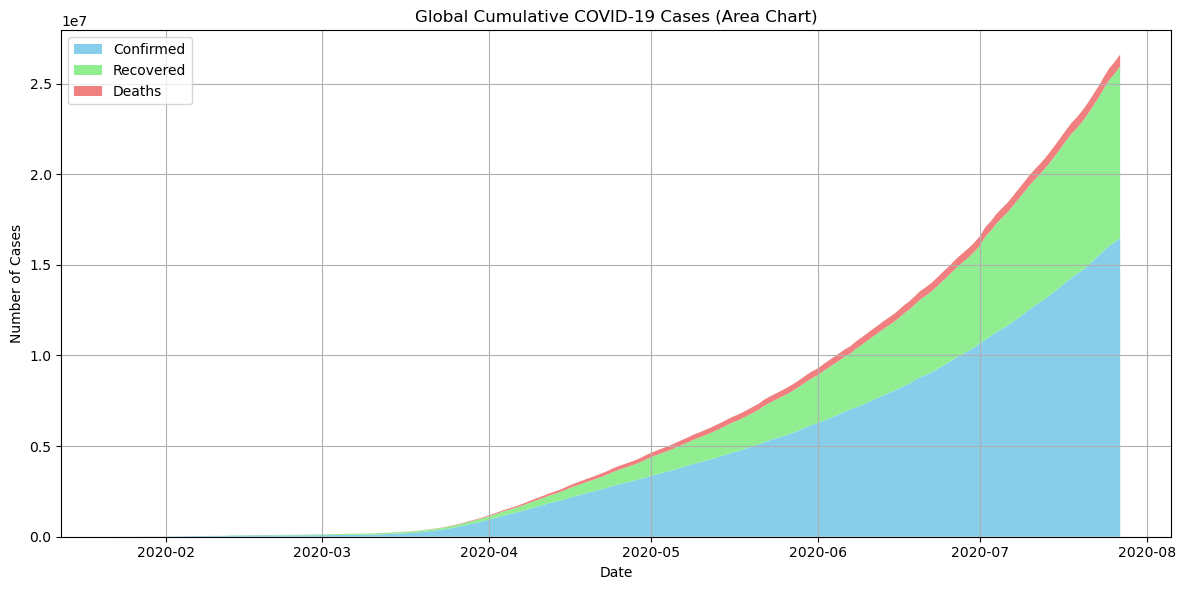

In [15]:
plt.figure(figsize=(12, 6))
plt.stackplot(global_daily['Date'],
              global_daily['Confirmed'],
              global_daily['Recovered'],
              global_daily['Deaths'],
              labels=['Confirmed', 'Recovered', 'Deaths'],
              colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Global Cumulative COVID-19 Cases (Area Chart)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Story:
Confirmed cases grew rapidly and form the largest area.

Recovery rates improved steadily, making up a major part of total cases.

Deaths formed a small but persistent part, showing how deadly the virus remained.

# Country Comparisons: Top 5 Countries

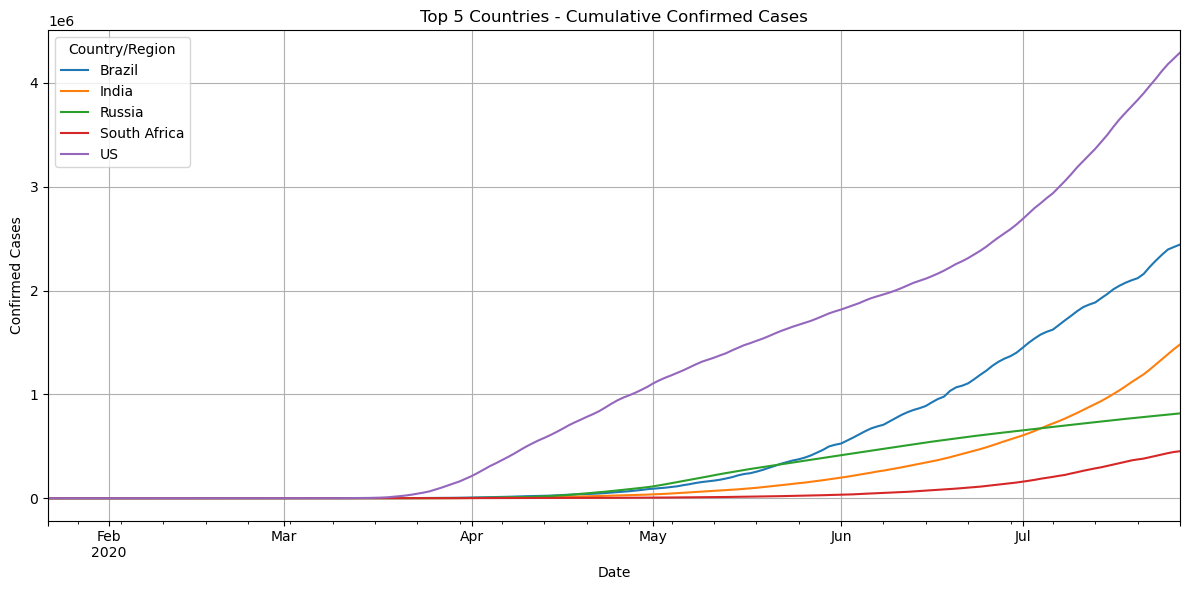

In [16]:
top_countries = df[df['Date'] == df['Date'].max()] \
                    .groupby('Country/Region')['Confirmed'] \
                    .sum().sort_values(ascending=False).head(5).index.tolist()

df_top = df[df['Country/Region'].isin(top_countries)]
country_trends = df_top.groupby(['Date', 'Country/Region'])['Confirmed'].sum().unstack()

country_trends.plot(figsize=(12, 6))
plt.title("Top 5 Countries - Cumulative Confirmed Cases")
plt.ylabel("Confirmed Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


Story:
Countries like the US, India, Brazil, Russia, and the UK experienced the highest number of confirmed cases.

Their curves often had multiple waves, corresponding to different virus variants and pandemic waves

# Heatmap of Deaths (Top 10 Countries)

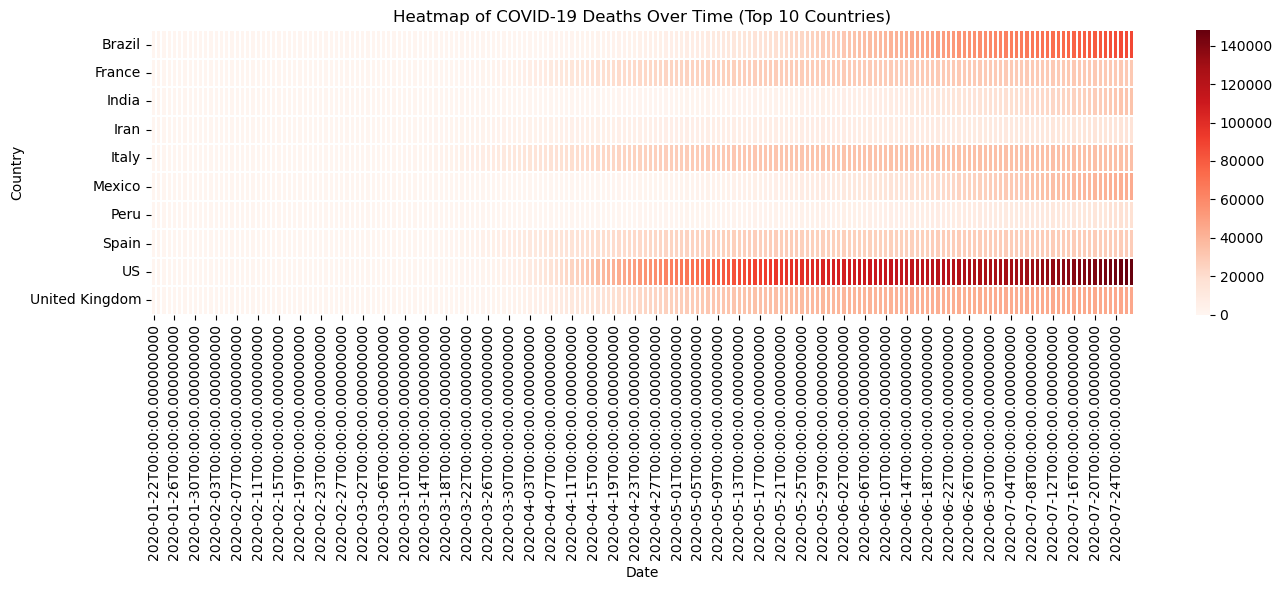

In [17]:
import seaborn as sns

top_10_deaths = df[df['Date'] == df['Date'].max()] \
                    .groupby('Country/Region')['Deaths'] \
                    .sum().sort_values(ascending=False).head(10).index.tolist()

df_death_trend = df[df['Country/Region'].isin(top_10_deaths)]
heatmap_data = df_death_trend.pivot_table(values='Deaths', index='Country/Region', columns='Date', aggfunc='sum')

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='Reds', linewidths=0.1)
plt.title("Heatmap of COVID-19 Deaths Over Time (Top 10 Countries)")
plt.xlabel("Date")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


Story:
Countries with high death rates appear darker.

The heatmap helps spot spikes in mortality and identify when each country faced its worst wave.